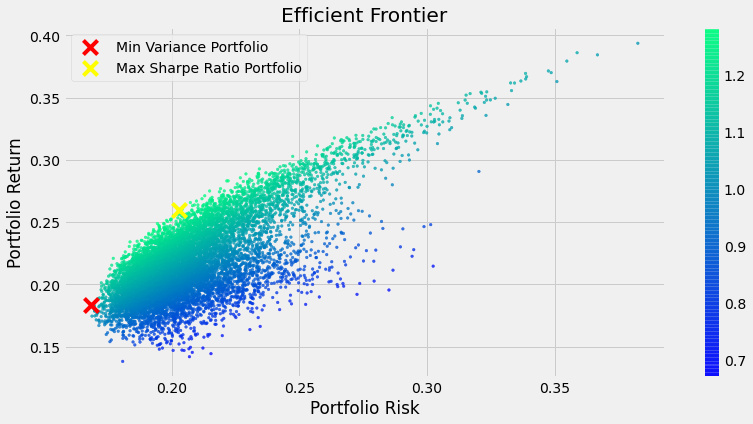

----------------------------------------------------------------------------------------------------
Return on Min Variance Potfolio 18.4%
Risk of Min Variance Potfolio 16.8%
Max Sharpe Ratio 1.282
Min Variance Weight [ 1.28054469 19.61504081  0.86416744 24.81640417  5.55533076  1.723942
 13.25204042  0.99913244  7.90412105 23.98927622]
Max Sharpe Ratio Weight [ 0.28667282 15.93950607 17.74148851  4.25289882  4.38425975  6.54039312
 24.17600972  0.38884792  1.14421712 25.14570617]
----------------------------------------------------------------------------------------------------


In [7]:
# This programs tries to optimize users portfolio using efficient frontier
#Check how can you get better random nos


import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import random
import seaborn as sns 

random.seed(445)
plt.style.use('fivethirtyeight')

data = pd.read_excel ('EfficienFrontier.xlsx',nrows=1512) 
df_per = pd.DataFrame(data, columns= ['Date','WFC','MSFT','TSLA','XOM','GOOGLE','TTM','AAPL','BIDU','COP','DIS'])
df_per['Date'] = df_per['Date'].astype('datetime64[ns]')
df_per=df_per.set_index('Date')

mask = np.zeros_like(df_per[['WFC','MSFT','TSLA','XOM','GOOGLE','TTM','AAPL','BIDU','COP','DIS']].corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
  _, ax = plt.subplots(figsize=(16,9))
  ax = sns.heatmap(df_per[['WFC','MSFT','TSLA','XOM','GOOGLE','TTM','AAPL','BIDU','COP','DIS']].corr(), annot=True, cmap="YlGnBu", mask=mask)


def port_mean(df,weights):
    return np.dot(df.mean(), weights)*252

def portfolioStd(df,weights):
    var=np.dot(weights.T,np.dot(df.cov(),weights))
    return np.sqrt(var*252)

def randomweights(df):
    rtd_round=np.random.dirichlet(np.ones(len(df.columns)),size=1)[0]
    return rtd_round


returns=list()
variance=list()
w=list()
sharpe_ratio=list()

for i in range(10000):
    weight=randomweights(df_per)
    ret=port_mean(df_per,weight)
    std=portfolioStd(df_per,weight)
    w.append(weight)
    returns.append(ret)
    variance.append(std)
    sharpe_ratio.append((ret/std).round(3))

plt.style.use('seaborn-colorblind')
plt.figure(figsize=(12, 6))
plt.scatter(variance,returns,c=sharpe_ratio, cmap='winter',s=7,alpha=0.75)
plt.colorbar()
plt.scatter(min(variance),returns[variance.index(min(variance))],c='Red',marker='x',s=200,label='Min Variance Portfolio')
plt.scatter(variance[sharpe_ratio.index(max(sharpe_ratio))],returns[sharpe_ratio.index(max(sharpe_ratio))],c='Yellow',marker='x',s=200,label='Max Sharpe Ratio Portfolio')
plt.title('Efficient Frontier')
plt.xlabel('Portfolio Risk')
plt.ylabel('Portfolio Return')
plt.legend()

plt.show()
print("-"*100)
print(f'Return on Min Variance Potfolio {returns[variance.index(min(variance))].round(3)*100}%')
print(f'Risk of Min Variance Potfolio {min(variance).round(3)*100}%')
print(f'Max Sharpe Ratio {max(sharpe_ratio).round(3)}')
print(f'Min Variance Weight {w[variance.index(min(variance))]*100}')
print(f'Max Sharpe Ratio Weight {w[sharpe_ratio.index(max(sharpe_ratio))]*100}')
print("-"*100)

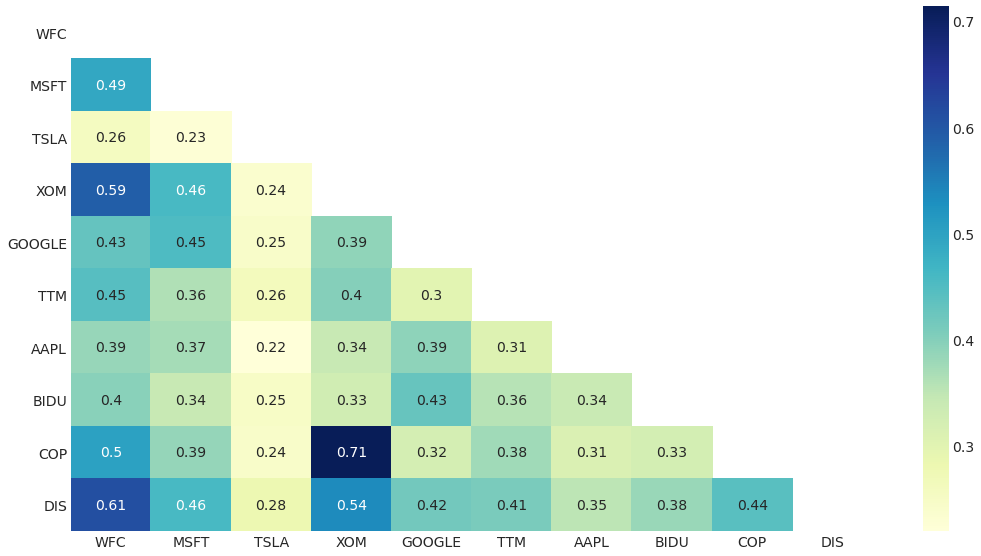